# Lab 2: Runtime Analysis

## <font color=DarkRed>Your Exercise: Performance of `del` keyword</font>

Devise an experiment that compares the performance of the `del` operator on lists and dictionaries.

### Helpful Code

In [41]:
# Make two lists of random 'data'
import random 
arry1 = [random.random() for i in range(5000)]
arry2 = [random.random() for i in range(5000)]

# Create a simple dictionary of key:val pairs using these two lists
d1 = dict(zip(arry1,arry2)) 

# How the deletion of a dictionary key works
print(d1)
d_keys = list(d1.keys()) 
del d1[d_keys[0]]
print(d1)

# Print an empty line for spacing
print()

# How the deletion of a dictionary key works
print(arry1)
del arry1[0]
print(arry1)

{0.41526537867069224: 0.042794692952253466, 0.1704171818875886: 0.7442268223667037, 0.05174063230418413: 0.38374547507098755, 0.6079331605179266: 0.5645463471581849, 0.768142385858348: 0.5358373609847088, 0.958967373887312: 0.8920277396894594, 0.8880942421099143: 0.9862435973390102, 0.4017111330212285: 0.37100730543865057, 0.7010970160287026: 0.5210344954696513, 0.7407454638792699: 0.7963796880325292, 0.8670652824663352: 0.5925859925334469, 0.7157995152933558: 0.9628061083315763, 0.1470378103034795: 0.03504768842845096, 0.3568930283668147: 0.9657148187496363, 0.7430071525704541: 0.9511207608372181, 0.4304684050783876: 0.4111718826494908, 0.039306689895770686: 0.7924652234627333, 0.17964400047835594: 0.38766037596066516, 0.8318074620881051: 0.4488079543920487, 0.264661593584822: 0.372198588138704, 0.8446368655369351: 0.5087957758251802, 0.8175547424363535: 0.286282798150879, 0.12592953380891203: 0.7828537743940702, 0.30315348851298174: 0.21645997133732087, 0.569792020114083: 0.053060355

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct.*

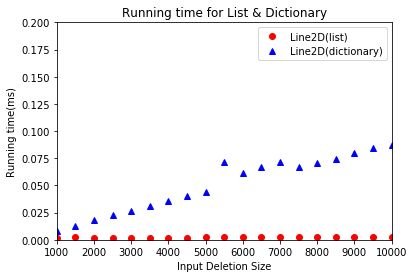

In [12]:
import timeit
import random

# create two functions for testing deletion of a list and a dictionary
def del_lst(lst, n):
    del lst[random.randint(0, len(lst)-1)]

def del_dic(dic, n):
    del dic[list(dic.keys())[random.randint(0, len(dic)-1)]]
    
# Time the deletion for the list and dictionary 
lt_times = dict()
dt_times = dict()

for n in range(1000,10001,500):
    # Make two lists of random 'data with range n'
    lst1 = [random.random() for i in range(n)]
    lst2 = [random.random() for i in range(n)]
    # Create a dictionary of key:val pairs using these two lists
    dic = dict(zip(lst1,lst2)) 

    lst_DelTime = timeit.Timer("del_lst(lst, n)", globals={"del_lst":del_lst, "lst":lst1, "n":n})
    lt_times[n] = lst_DelTime.timeit(1000)
    
    dic_DelTime = timeit.Timer("del_dic(dic, n)", globals={"del_dic":del_dic, "dic":dic, "n":n})
    dt_times[n] = dic_DelTime.timeit(1000)

    
# Plot the running time for the list and the dictionary 
import matplotlib.pyplot as plt

l1,=plt.plot(list(lt_times.keys()), list(lt_times.values()), 'ro',label="list")
l2,=plt.plot(list(dt_times.keys()), list(dt_times.values()), 'b^',label="dictionary")
plt.axis([1000,10000,0,0.2])
plt.title("Running time for List & Dictionary")
plt.xlabel("Input Deletion Size")
plt.ylabel("Running time(ms)")
legend=plt.legend([l1,l2])
plt.show()

## PLOT

## Testing

For full credit, you must also test your solution so that you can prove to the grade your solution works.

In [13]:
makeListSize(6000)

# Set the test for timing the deletion 
t1 = timeit.Timer("del_lst()", "from __main__ import del_lst")
print("del_lst takes",t1.timeit(number=6000), "milliseconds")
    
t2 = timeit.Timer("del_dic()", "from __main__ import del_dic")
print("del_dic takes",t2.timeit(number=6000), "milliseconds")

del_lst takes 0.013671948996488936 milliseconds
del_dic takes 0.25096072000451386 milliseconds


In [14]:
makeListSize(10000)

# Set the test for timing the deletion 
t1 = timeit.Timer("del_lst()", "from __main__ import del_lst")
print("del_lst takes",t1.timeit(number=10000), "milliseconds")
    
t2 = timeit.Timer("del_dic()", "from __main__ import del_dic")
print("del_dic takes",t2.timeit(number=10000), "milliseconds")

del_lst takes 0.032681395998224616 milliseconds
del_dic takes 0.7258554799991543 milliseconds


In [94]:
print("lst_DelTime() dic_DelTime()")
lt_times = dict()
dt_times = dict()
for i in range(1000,10001,500):
    makeListSize(i)
    lt = lst_DelTime.timeit(number=i)
    dt = dic_DelTime.timeit(number=i)
    lt_times[i] = lt
    dt_times[i]= dt

lst_DelTime() dic_DelTime()
